# **Part 1** *Regression with clustering*
Here we use clustering to improve the performance of a regression 
t. We'll use the
Boston Housing data available in Python. Recall that the task here is to predict
the median house in various neighborhoods, based on their characteristics. 

The idea of this task is to improve the fit by first clustering the data, and training
separate linear models on each cluster (instead of using a single linear model on the
entire dataset).

In [ ]:
from keras.datasets import boston_housing
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(i) Use ridge regression as a baseline model: train a ridge regression model on the
training data, and evaluate the mean squared error on the test data.

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data() 
ss = MinMaxScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

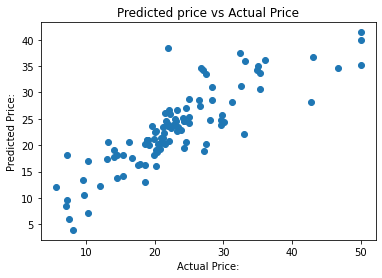

In [ ]:
rr = RidgeCV()
rr.fit(x_train, y_train)
y_pred_train = rr.predict(x_train)
y_pred = rr.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price:")
plt.ylabel("Predicted Price:")
plt.title("Predicted price vs Actual Price")
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  23.04844860626025


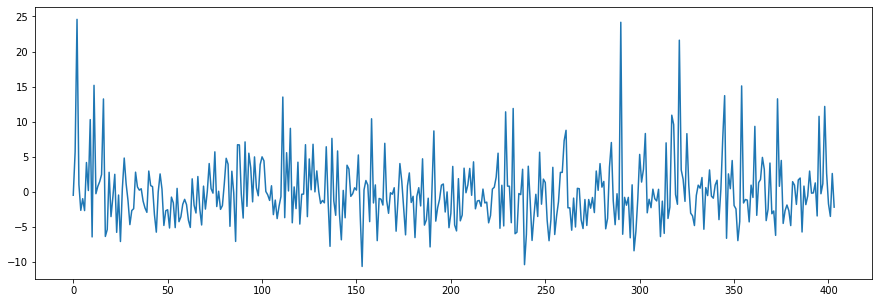

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(y_train - rr.predict(x_train))

(ii) Now use k-means clustering to cluster the training data, using only the inputs
x_train for the clustering and not the labels y_train. The reason we cluster
using on the inputs is that we will want a model that can make predictions
based only on test inputs x_test, without 
rst seeing the labels y_test. Use
k = 3 clusters. Visualize the clusters by projecting the data onto the plane and
using a scatter plot (e.g. by plotting the 
rst two variables of each data point).

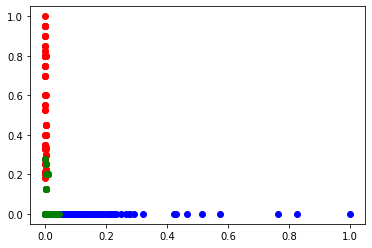

In [ ]:
kmeans = KMeans(3).fit(x_train)
plt.scatter(x_train[kmeans.labels_ == 0, 0], x_train[kmeans.labels_ == 0, 1], color = 'red')
plt.scatter(x_train[kmeans.labels_ == 1, 0], x_train[kmeans.labels_ == 1, 1], color = 'blue')
plt.scatter(x_train[kmeans.labels_ == 2, 0], x_train[kmeans.labels_ == 2, 1], color = 'green')
plt.show()

The three clusters are well-defined.

(iii) Train three separate ridge regression models T1; T2; T3 , one for each cluster,
with each model trained using only the data from the corresponding cluster.
What is the total mean squared error on the test data clustered using the same
centroids found for the training data?

In [ ]:
# Kmeans model + 3 ridge regression models
T1 = RidgeCV()
T2 = RidgeCV()
T3 = RidgeCV()

ridge_models = [T1, T2, T3]

cluster_predict_train = kmeans.predict(x_train)
cluster_predict_test = kmeans.predict(x_test)

for i in range(3):
    x_train_new = x_train[(cluster_predict_train == i)]
    y_train_new = y_train[(cluster_predict_train == i)]
    ridge_models[i].fit(x_train_new, y_train_new)

y_predict = []
for i in range(len(x_test)):
    index = cluster_predict_test[i]
    predict = ridge_models[index].predict(x_test[i].reshape(1, -1))
    y_predict.append(predict[0])

score = mean_squared_error(y_test, y_predict)
print("Kmeans with three ridge regression models' MSE is: \n", score)



Kmeans with three ridge regression models' MSE is: 
 15.478557760374315


Hence, the prediction accuracy is better than the ridge regression alone.

# **Part 2** *Open-ended exploration*
Go beyond your 
finndings in Part 1 to explore a question of interest to your group.
For example, you could apply the method to a different dataset or propose a modified
approach and compare your results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Real estate.csv')
X = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=777)

In [ ]:
## Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_MAE = metrics.mean_absolute_error(y_test, lr_pred)
lr_MSE = metrics.mean_squared_error(y_test, lr_pred)
lr_RMSE = np.sqrt(lr_MSE)

7.7048414484387875


In [ ]:
## Ridge Regression
rr = RidgeCV()
rr.fit(X_train, y_train)
rr_pred = rr.predict(X_test)
rr_MAE = metrics.mean_absolute_error(y_test, rr_pred)
rr_MSE = metrics.mean_squared_error(y_test, rr_pred)
rr_RMSE = np.sqrt(rr_MSE)

7.741108956410246


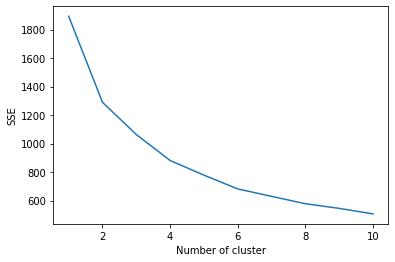

In [ ]:
## K-means + RidgeRegression
### Elbow Criterion:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

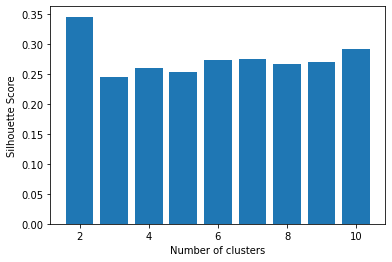

In [ ]:
### Silhouette Coefficient Method:
silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(
        silhouette_score(X_train, KMeans(n_clusters=n_cluster).fit_predict(X_train)))
k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()

From the result, we learn that the reasonable number of cluster k should be 2.

In [ ]:
#### Combining the two results, k = 2 is the best.
# Cluster the training data using k-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
k_pred = kmeans.predict(X_test)
# Perform ridge regression on each group separately
for i in range(2):
    group = X_train[kmeans.labels_ == i]
    y = y_train[kmeans.labels_ == i]

    model = RidgeCV()
    model.fit(group, y)

    # Calculate the MSE for this group
    if(i == 0):
        y_pred = model.predict(X_test[k_pred == i])
        y_c = y_test[k_pred == i]
    else:
        y_pred = [*y_pred, *model.predict(X_test[k_pred == i])]
        y_c = [*y_c,*y_test[k_pred == i]]


kr_MSE = metrics.mean_squared_error(y_c, y_pred)
print('MSE of LR: ',lr_MSE)
print('MSE of RR: ',rr_MSE)
print('MSE of K+R: ',kr_MSE)

MSE of LR:  59.36458174558031
MSE of RR:  59.92476787501492
MSE of K+R:  48.64647411520541


It can be seen that using a combination of k-means and ridge regression gives much higher prediction accuracy than either linear regression or ridge regression alone.